# Proyecto Parte 2: Programming Mars Final Project

**10/03/2021**

> - Ian Timothy Henry Suárez A01701578
> - Fernando Guevara Moreno A00828723

In [2]:
# Cargamos la imagen
from PIL import Image
import numpy as np

image = Image.open('planetaActualizado.jpg', 'r')
image2 = image.resize((40,40)) # Reducimos la imagen para poder visualizar los pixeles
width, height = image2.size # Obtenemos las dimensiones
indexed2 = np.array(image2) # Creamos un arreglo con las coodenadas y los valores RGB
#indexed = np.array(image)

indexed2.shape

(40, 40, 3)

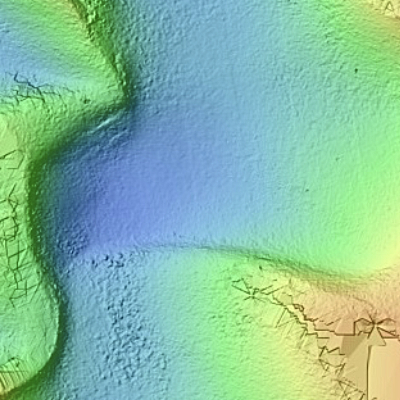

In [3]:
image

In [4]:
# Transformamos el formato RGB a una escala de grises para tener un solo valor para cada color
gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114]) 
gray = gray(indexed2);
gray.size

1600

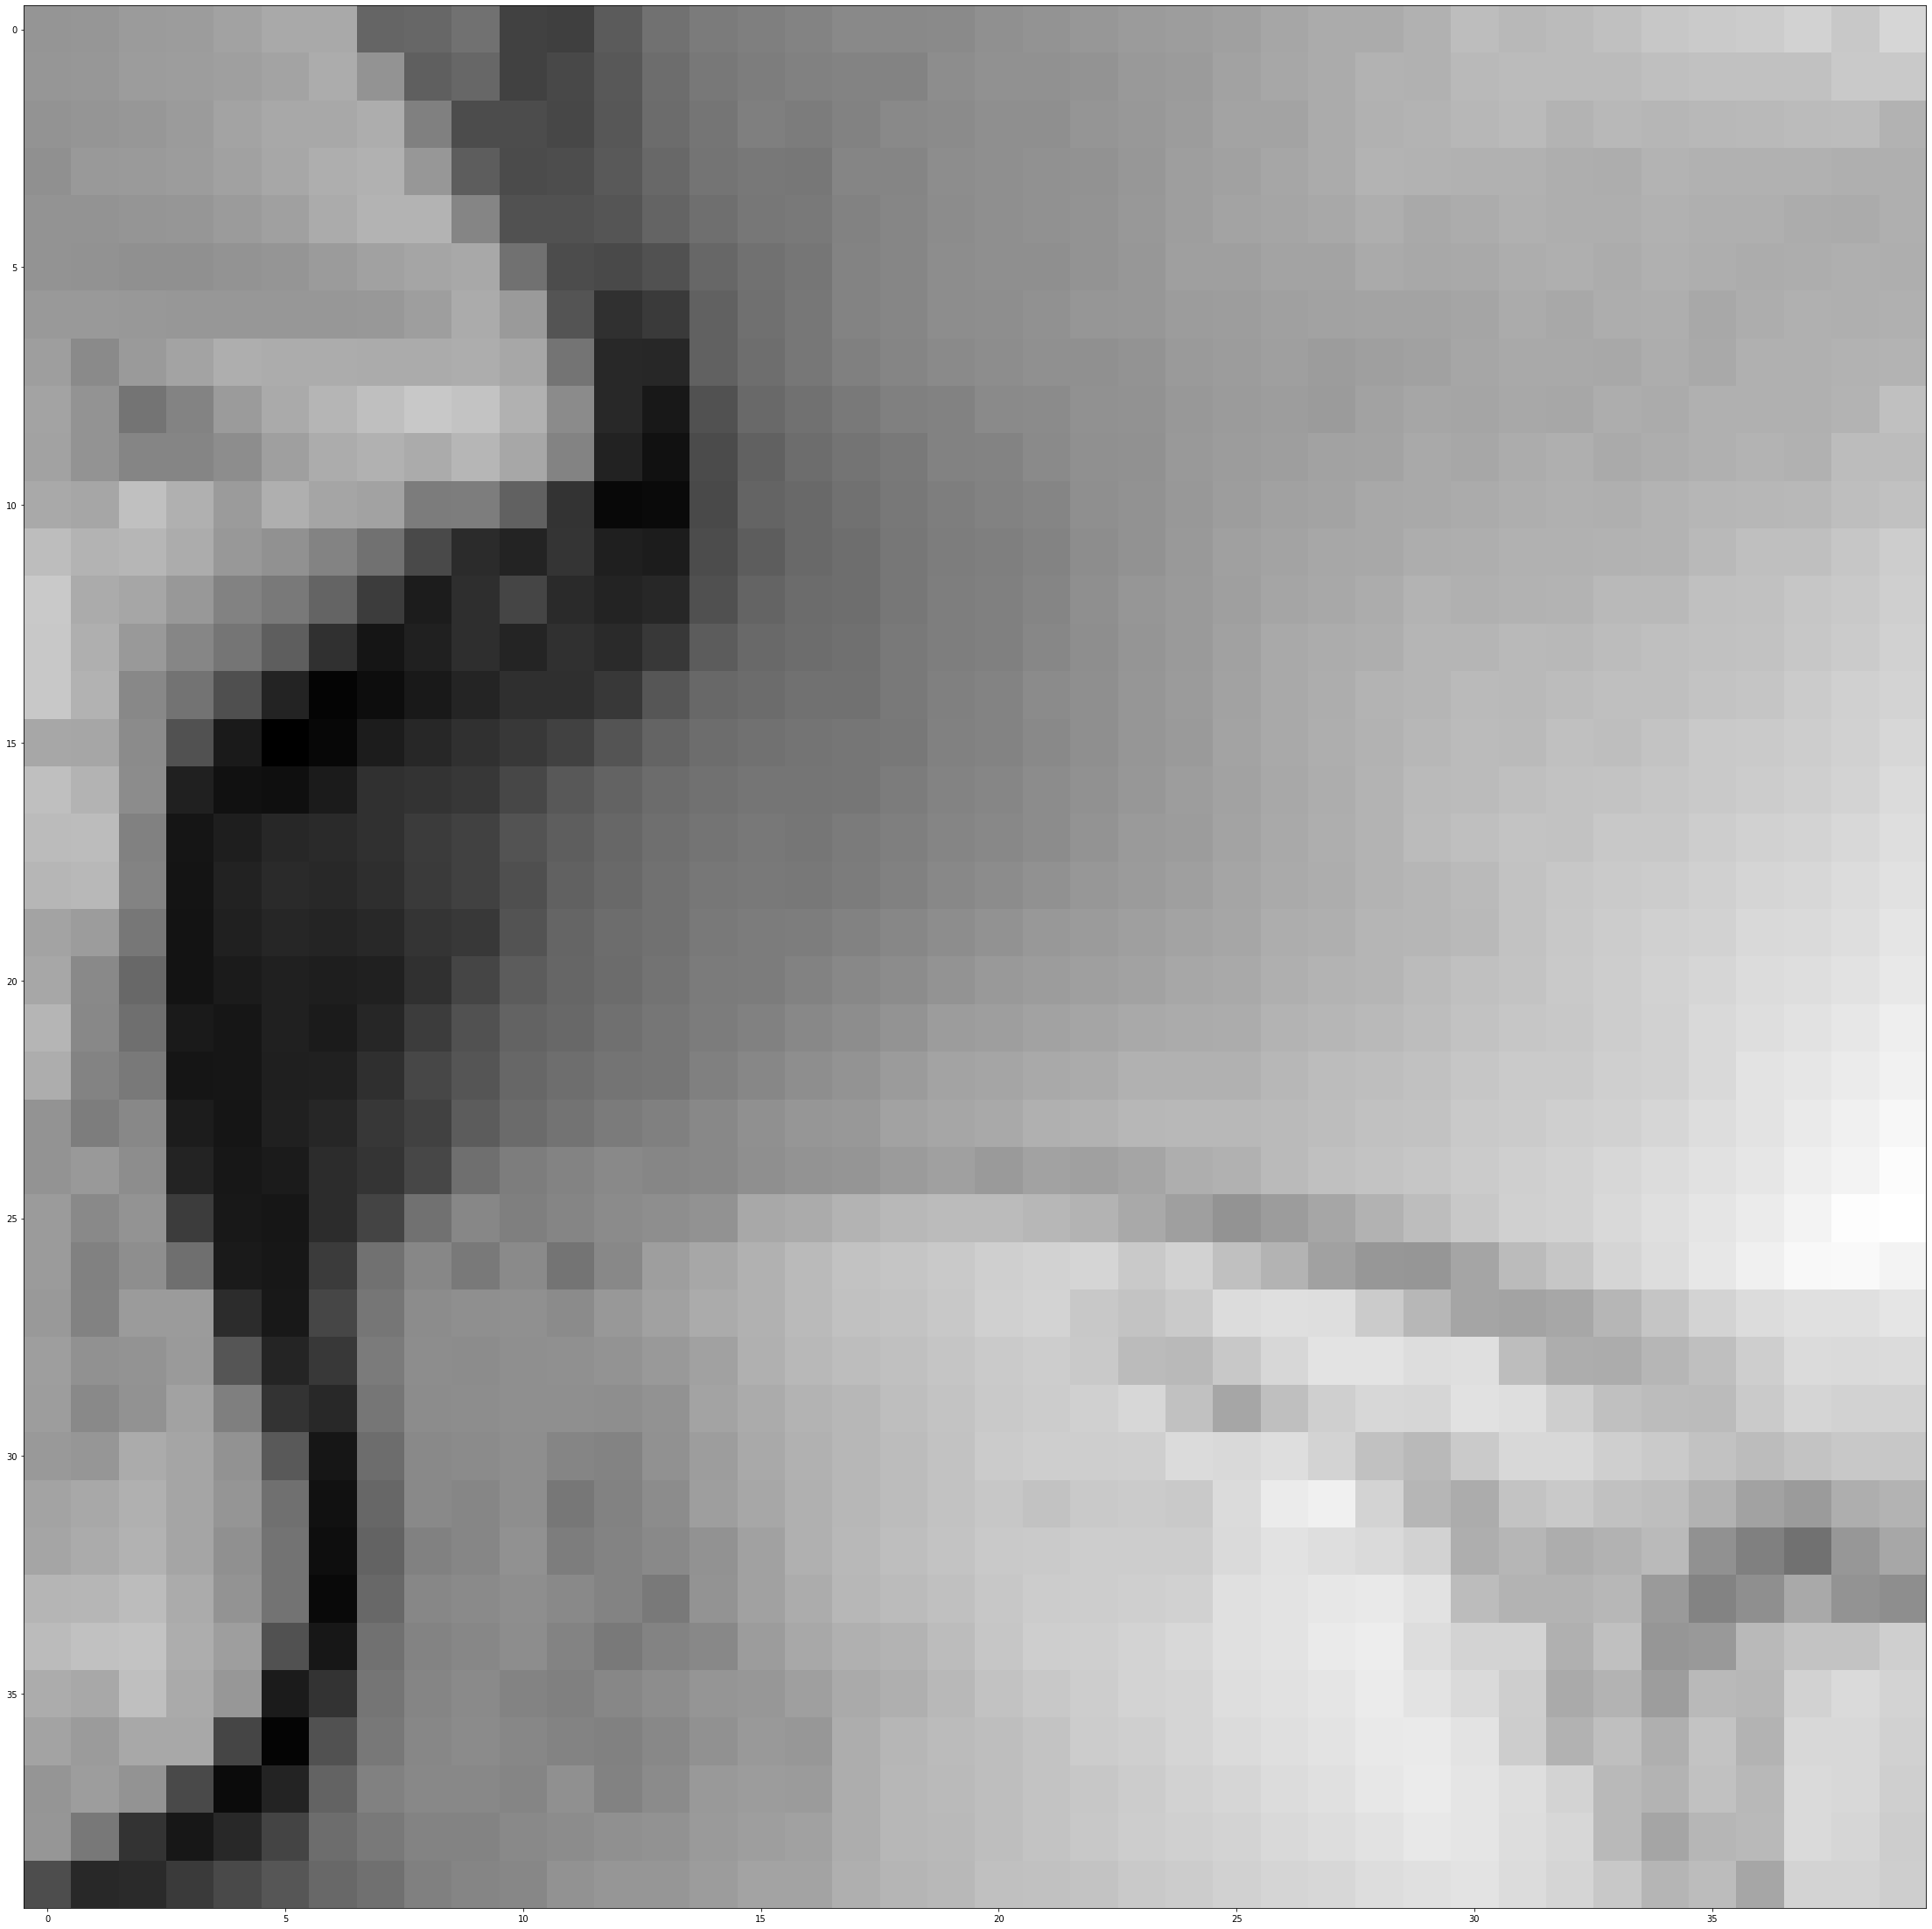

In [5]:
# Lo graficamos
import matplotlib.pyplot as plt
plt.figure(figsize = (40,40))
plt.imshow(gray, cmap = plt.get_cmap(name = 'gray'))
plt.show()

In [6]:
# Creamos una función para mapear las alturas en la escala de grises
def mapAltura(datos, maxR, minR):
    alturas = np.zeros([datos.shape[0],datos.shape[1]])
    m = (maxR-minR)/(np.max(datos)-np.min(datos))
    b = minR - (m * np.min(datos))
    for row in range(datos.shape[0]):
        for col in range(datos.shape[1]):
            alturas[row, col] = m * datos[row][col] + b
    return alturas

In [7]:
# Comprobamos la función
maxM = 1093
minM = 780

alt = mapAltura(gray, maxM, minM)
print(np.max(alt))
print(np.min(alt))

1093.0
780.0


In [8]:
alt.shape

(40, 40)

In [9]:
# Importamos seaborn
import seaborn as sns

<AxesSubplot:>

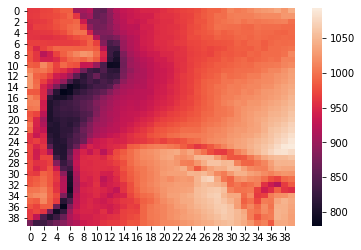

In [10]:
# Obtenemos el mapa de calor con los valores de las alturas en escala de grises
sns.heatmap(alt)

> # Creamos la clase del grid

In [11]:
# Creamos la clase del grid 
class SquareGrid:
    """A class to represent a grid map with obstacles."""
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.walls = []
    
    def in_bounds(self, id):
        (x, y) = id
        return 0 < x <= self.width and 0 < y <= self.height
    
    def passable(self, id):
        return id not in self.walls   # not passable nodes are walls
    
    def neighbors(self, id):
        """Return neighboring passable nodes."""
        (x, y) = id
        results = [(x+1, y), (x, y-1), (x-1, y), (x, y+1)]
        if (x + y) % 2 == 0: results.reverse() # aesthetics
        results = filter(self.in_bounds, results)
        results = filter(self.passable, results)
        return results
    
    def draw(self, goal=None, route=None):
        """Print a representation of the grid."""
        grid = [[' . ' for _ in range(self.width)] for _ in range(self.height)]
        
        def modify_grid(symbol, i, j):
            grid[self.height - j][i - 1] = symbol 

        for node in self.walls:
            modify_grid(' # ', *node)

        if goal:
            modify_grid(' X ', *goal)

        # print the directions traversed along a route
        if route:
            comes = route[goal]
            goes = goal
            step = 0
            while comes: 
                x1, y1 = comes
                x2, y2 = goes
                xdir = x2 - x1
                ydir = y2 - y1
                if xdir > 0:
                    modify_grid(' > ', *comes)
                elif xdir < 0:
                    modify_grid(' < ', *comes)
                elif ydir > 0:
                    modify_grid(' ^ ', *comes)
                else:
                    modify_grid(' v ', *comes)
                goes = comes
                comes = route[comes]
                step += 1
            print("Number of steps:", step)

        for row in grid:
            print(''.join(row))

In [12]:
# Creamos las paredes en los nodos donde haya una diferencia de altura de mas de 10 metros con alguno de sus vecinos
walls = []

for y in range(height-1):
    for x in range(width-1):
        dif1 = abs(alt[y][x] - alt[y-1][x])
        dif2 = abs(alt[y][x] - alt[y][x+1])
        dif3 = abs(alt[y][x] - alt[y+1][x])
        dif4 = abs(alt[y][x] - alt[y][x-1])
        dif = 10                                                        # Diferencia en metros
        if (dif1 > dif) or (dif2 > dif) or (dif3 > dif) or (dif4 > dif):
            walls.append((x+1,height-y-1))
            
len(walls)

874

In [13]:
# Mostramos el mapa
grid = SquareGrid(width, height)
start = (40, 1)
goal = (12, 17)
grid.walls = walls
grid.draw(goal)

 .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  .  #  #  #  #  #  . 
 #  .  .  .  .  .  #  #  #  #  #  #  #  #  #  .  .  .  #  #  .  .  .  .  .  .  .  .  .  .  .  .  .  .  #  #  #  #  #  . 
 #  .  .  #  #  .  .  #  #  #  #  #  #  #  #  #  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  #  .  #  #  #  #  #  #  . 
 #  #  .  .  .  .  .  #  #  #  #  #  #  #  #  .  #  #  #  #  .  .  .  .  .  .  .  .  .  #  .  #  .  #  .  .  #  #  #  . 
 #  .  .  .  .  #  #  #  #  #  #  .  #  #  #  .  .  .  .  .  .  .  .  .  .  .  .  .  .  #  .  .  .  .  .  .  .  .  .  . 
 #  .  .  .  .  #  #  #  #  #  #  #  #  #  #  #  #  #  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 #  #  .  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 #  #  #  #  #  #  #  #  #  #  #

> # Algorítmos de búsqueda no informados

> **Breath First Search**

In [14]:
# Creamos una estructura de datos de tipo FIFO
import collections

class Queue:
    """Clase para implementar una lista FIFO"""
    def __init__(self):
        self.elements = collections.deque()
    
    def empty(self):
        return len(self.elements) == 0
    
    def put(self, x):
        self.elements.append(x)
    
    def get(self):
        """Regresa el objeto más antiguo"""
        return self.elements.popleft()

In [15]:
# Implementamos breath first search
def breadth_first_search(graph, start, goal):
    """Search for path along an expanding frontier."""
    frontier = Queue()
    frontier.put(start)   # start position is the first node
    came_from = {}        # stores the parent node
    came_from[start] = None
    
    while not frontier.empty():
        current = frontier.get()
        
        if current == goal:
            break
            
        for next in graph.neighbors(current):
            if next not in came_from:
                frontier.put(next)
                came_from[next] = current
                
    return came_from

In [16]:
came_from=breadth_first_search(grid, start, goal)
grid.draw(goal, came_from)

Number of steps: 48
 .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  .  #  #  #  #  #  . 
 #  .  .  .  .  .  #  #  #  #  #  #  #  #  #  .  .  .  #  #  .  .  .  .  .  .  .  .  .  .  .  .  .  .  #  #  #  #  #  . 
 #  .  .  #  #  .  .  #  #  #  #  #  #  #  #  #  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  #  .  #  #  #  #  #  #  . 
 #  #  .  .  .  .  .  #  #  #  #  #  #  #  #  .  #  #  #  #  .  .  .  .  .  .  .  .  .  #  .  #  .  #  .  .  #  #  #  . 
 #  .  .  .  .  #  #  #  #  #  #  .  #  #  #  .  .  .  .  .  .  .  .  .  .  .  .  .  .  #  .  .  .  .  .  .  .  .  .  . 
 #  .  .  .  .  #  #  #  #  #  #  #  #  #  #  #  #  #  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 #  #  .  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 #  #  #  # 

> **Depth First Search**

In [17]:
# Creamos una estructura de datos tipo LIFO
class Stack:
    """Clase para implementar una lista LIFO, it returns the last input"""
    def __init__(self):
        self.elements = collections.deque()
        
    def empty(self):
        return len(self.elements) == 0
    
    def put(self, x):
        self.elements.append(x)
        
    def get(self):
        return self.elements.pop()

In [18]:
# Implementamos depth first search
def depth_first_search(graph, start, goal):
    """Search for path along an expanding frontier."""
    frontier = Stack()
    frontier.put(start)   # start position is the first node
    came_from = {}        # stores the parent node
    came_from[start] = None
    
    while not frontier.empty():
        current = frontier.get()
        
        if current == goal:
            break

        for next in graph.neighbors(current):
            if next not in came_from:
                frontier.put(next)
                came_from[next] = current
            
    return came_from

In [19]:
came_from=depth_first_search(grid, start, goal)
grid.draw(goal, came_from)

Number of steps: 120
 .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  .  #  #  #  #  #  . 
 #  .  .  .  .  .  #  #  #  #  #  #  #  #  #  .  .  .  #  #  .  .  .  .  .  .  .  .  .  .  .  .  .  .  #  #  #  #  #  . 
 #  .  .  #  #  .  .  #  #  #  #  #  #  #  #  #  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  #  .  #  #  #  #  #  #  . 
 #  #  .  .  .  .  .  #  #  #  #  #  #  #  #  .  #  #  #  #  .  .  .  .  .  .  .  .  .  #  .  #  .  #  .  .  #  #  #  . 
 #  .  .  .  .  #  #  #  #  #  #  .  #  #  #  .  .  .  v  <  <  .  .  .  .  .  .  .  .  #  .  .  .  .  .  .  .  .  .  . 
 #  .  .  .  .  #  #  #  #  #  #  #  #  #  #  #  #  #  v  .  ^  <  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 #  #  .  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  >  v  .  ^  <  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 #  #  #  #

> **Uniform cost search**

In [20]:
# Creamos la clase para el grid con valores
class GridWithWeights(SquareGrid):
    """A class to represent a grid with weights."""
    def __init__(self, width, height, alt):
        super().__init__(width, height)
        self.weights = {}
        self.alt = alt
       
        
    def cost(self, from_node, to_node):
        (x1, y1) = from_node
        (x2, y2) = to_node
        value = self.alt[(self.height - y2)][x2 - 1] - self.alt[(self.height - y1)][x1 - 1]
        return self.weights.get(to_node, value)

In [21]:
import heapq

class PriorityQueue:
    """A class to implement priority queues.
    Each node is less or equal to its children, and the root
    is the smallest value in the queue.
    """
    def __init__(self):
        self.elements = []
    
    def empty(self):
        return len(self.elements) == 0
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        """Return item with smallest priority value."""
        return heapq.heappop(self.elements)[1]

In [22]:
# Implementamos uniform cost search
def dijkstra_search(graph, start, goal):
    """Search for least costly path along an expanding frontier."""
    frontier = PriorityQueue()
    frontier.put(start, 0)    # start position has cost 0
    came_from = {}            # stores the parent node
    cost_so_far = {}          # cost from start to current node
    came_from[start] = None
    cost_so_far[start] = 0
    
    while not frontier.empty():
        current = frontier.get()
        
        if current == goal:
            break
        
        for next in graph.neighbors(current):
            
            new_cost = cost_so_far[current] + graph.cost(current,next)
            
            # ignore already traversed nodes unless new route is less costly
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                priority = new_cost
                frontier.put(next, priority)
                came_from[next] = current     # assign current node as parent
    
    return came_from, cost_so_far

In [23]:
# Búsqueda de costo uniforme con paredes
gridV = GridWithWeights(grid.width, grid.height, alt)
gridV.walls = grid.walls
came_from, cost_so_far = dijkstra_search(gridV, start, goal)
gridV.draw(route=came_from, goal=goal)

Number of steps: 56
 .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  .  #  #  #  #  #  . 
 #  .  .  .  .  .  #  #  #  #  #  #  #  #  #  .  .  .  #  #  .  .  .  .  .  .  .  .  .  .  .  .  .  .  #  #  #  #  #  . 
 #  .  .  #  #  .  .  #  #  #  #  #  #  #  #  #  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  #  .  #  #  #  #  #  #  . 
 #  #  .  .  .  .  .  #  #  #  #  #  #  #  #  .  #  #  #  #  .  .  .  .  .  .  .  .  .  #  .  #  .  #  .  .  #  #  #  . 
 #  .  .  .  .  #  #  #  #  #  #  .  #  #  #  .  .  .  .  .  .  .  .  .  .  .  .  .  .  #  .  .  .  .  .  .  .  .  .  . 
 #  .  .  .  .  #  #  #  #  #  #  #  #  #  #  #  #  #  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 #  #  .  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 #  #  #  # 

In [24]:
# Búsqueda de costo uniforme sin paredes
gridV = GridWithWeights(grid.width, grid.height, alt)
came_from, cost_so_far = dijkstra_search(gridV, start, goal)
gridV.draw(route=came_from, goal=goal)

Number of steps: 46
 .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 .  .  .  . 

> # Algoritmos de búsqueda informados

> **Greedy search**

In [25]:
# Establecemos la heuristica 1 y 2
import math

def heuristic1(a, b): 
    """Return estimated cost between two points."""
    
    (x1, y1) = a
    (x2, y2) = b
    
    heuristica = abs(x1 - x2) + abs(y1 - y2) # Distancia Manhattan
    
    
    return heuristica

In [26]:
def greedy_search1(graph, start, goal):
    """Search for smaller heuristic path.""" 
    frontier = PriorityQueue()
    frontier.put(start, heuristic1(start,goal))
    came_from = dict()
    came_from[start] = None

    while not frontier.empty():
        current = frontier.get()

        if current == goal:
            break
        
        for next in graph.neighbors(current):
            if next not in came_from:
                priority = heuristic1(goal, next)
                frontier.put(next, priority)
                came_from[next] = current
                
    
    return came_from

In [27]:
came_from = greedy_search1(grid, start, goal)
grid.draw(route=came_from, goal=goal)

Number of steps: 48
 .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  .  #  #  #  #  #  . 
 #  .  .  .  .  .  #  #  #  #  #  #  #  #  #  .  .  .  #  #  .  .  .  .  .  .  .  .  .  .  .  .  .  .  #  #  #  #  #  . 
 #  .  .  #  #  .  .  #  #  #  #  #  #  #  #  #  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  #  .  #  #  #  #  #  #  . 
 #  #  .  .  .  .  .  #  #  #  #  #  #  #  #  .  #  #  #  #  .  .  .  .  .  .  .  .  .  #  .  #  .  #  .  .  #  #  #  . 
 #  .  .  .  .  #  #  #  #  #  #  .  #  #  #  .  .  .  .  .  .  .  .  .  .  .  .  .  .  #  .  .  .  .  .  .  .  .  .  . 
 #  .  .  .  .  #  #  #  #  #  #  #  #  #  #  #  #  #  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 #  #  .  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 #  #  #  # 

In [28]:
def heuristic2(a, b):
    """Return estimated cost between two points."""
    
    (x1, y1) = a
    (x2, y2) = b
    
    heuristica = math.sqrt((x1 - x2)**2 + (y1 - y2)**2) # Distancia euclidiana
   
    
    return heuristica

In [29]:
def greedy_search2(graph, start, goal):
    """Search for smaller heuristic path.""" 
    frontier = PriorityQueue()
    frontier.put(start, heuristic2(start,goal))
    came_from = dict()
    came_from[start] = None

    while not frontier.empty():
        current = frontier.get()

        if current == goal:
            break
        
        for next in graph.neighbors(current):
            if next not in came_from:
                priority = heuristic2(goal, next)
                frontier.put(next, priority)
                came_from[next] = current
                
    
    return came_from

In [30]:
came_from = greedy_search2(grid, start, goal)
grid.draw(route=came_from, goal=goal)

Number of steps: 48
 .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  .  #  #  #  #  #  . 
 #  .  .  .  .  .  #  #  #  #  #  #  #  #  #  .  .  .  #  #  .  .  .  .  .  .  .  .  .  .  .  .  .  .  #  #  #  #  #  . 
 #  .  .  #  #  .  .  #  #  #  #  #  #  #  #  #  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  #  .  #  #  #  #  #  #  . 
 #  #  .  .  .  .  .  #  #  #  #  #  #  #  #  .  #  #  #  #  .  .  .  .  .  .  .  .  .  #  .  #  .  #  .  .  #  #  #  . 
 #  .  .  .  .  #  #  #  #  #  #  .  #  #  #  .  .  .  .  .  .  .  .  .  .  .  .  .  .  #  .  .  .  .  .  .  .  .  .  . 
 #  .  .  .  .  #  #  #  #  #  #  #  #  #  #  #  #  #  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 #  #  .  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 #  #  #  # 

> **A* Search**

In [31]:
def a_star_search(graph, start, goal):
    """Search for least costly path along expanding frontier with heuristic.""" 
    frontier = PriorityQueue()
    frontier.put(start, 0)    # start position has cost 0
    came_from = {}            # stores the parent node
    cost_so_far = {}          # cost from start to current node
    came_from[start] = None
    cost_so_far[start] = 0
    
    while not frontier.empty():
        current = frontier.get()
        
        if current == goal:
            break
        
        for next in graph.neighbors(current):
            new_cost = cost_so_far[current] + graph.cost(current, next)
            # ignore already traversed nodes unless new route is less costly
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
               
                priority = new_cost
               
                
                frontier.put(next, priority)
                came_from[next] = current
    
    return came_from, cost_so_far

In [32]:
gridV = GridWithWeights(grid.width, grid.height, alt)
gridV.walls = grid.walls
came_from, cost_so_far = a_star_search(gridV, start, goal)
grid.draw(route=came_from, goal=goal)

Number of steps: 56
 .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  .  #  #  #  #  #  . 
 #  .  .  .  .  .  #  #  #  #  #  #  #  #  #  .  .  .  #  #  .  .  .  .  .  .  .  .  .  .  .  .  .  .  #  #  #  #  #  . 
 #  .  .  #  #  .  .  #  #  #  #  #  #  #  #  #  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  #  .  #  #  #  #  #  #  . 
 #  #  .  .  .  .  .  #  #  #  #  #  #  #  #  .  #  #  #  #  .  .  .  .  .  .  .  .  .  #  .  #  .  #  .  .  #  #  #  . 
 #  .  .  .  .  #  #  #  #  #  #  .  #  #  #  .  .  .  .  .  .  .  .  .  .  .  .  .  .  #  .  .  .  .  .  .  .  .  .  . 
 #  .  .  .  .  #  #  #  #  #  #  #  #  #  #  #  #  #  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 #  #  .  #  #  #  #  #  #  #  #  #  #  #  #  #  #  #  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  . 
 #  #  #  # 

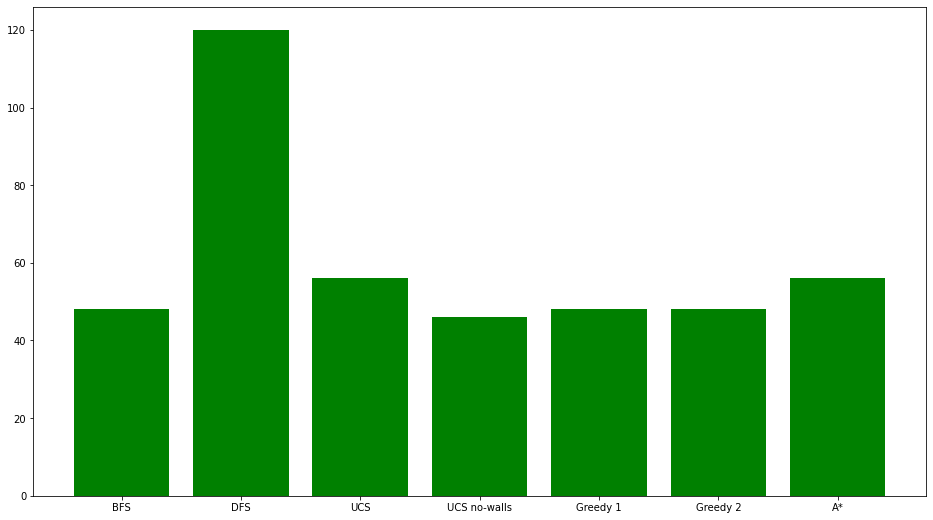

In [5]:
# Graficamos la cantidad de pasos de cada algoritmo
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

steps = [48,120,56,46,48,48,56] 
names = ["BFS", "DFS", "UCS", "UCS no-walls","Greedy 1","Greedy 2", "A*"]

plt.figure(figsize = (16,9))
plt.bar(names, steps, color = 'green')
plt.show()